In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D
from tensorflow.keras import datasets, layers, models
import plotly.express as px
import random
from sklearn.metrics import accuracy_score,mean_squared_error

In [4]:
import zipfile
zip_r = zipfile.ZipFile('/content/sign_mnist_train.zip')
zip_r.extractall('/content')
zip_r.close()

In [2]:
import zipfile
zip_r = zipfile.ZipFile('/content/sign_mnist_test.zip')
zip_r.extractall('/content')
zip_r.close()

In [5]:
import pandas as pd
train = pd.read_csv('/content/sign_mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
test = pd.read_csv('/content/sign_mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
train.shape
test.shape

(7172, 785)

In [10]:
train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [11]:
test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

<Axes: >

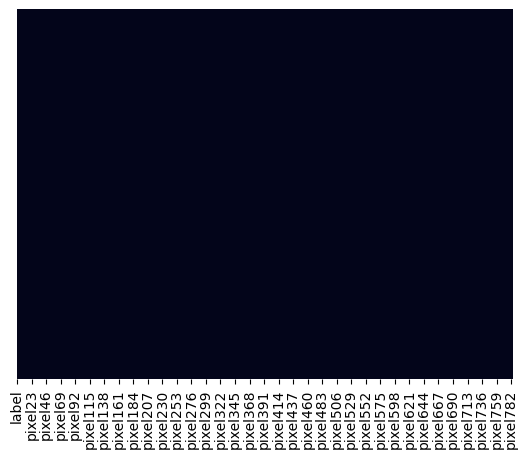

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<Axes: >

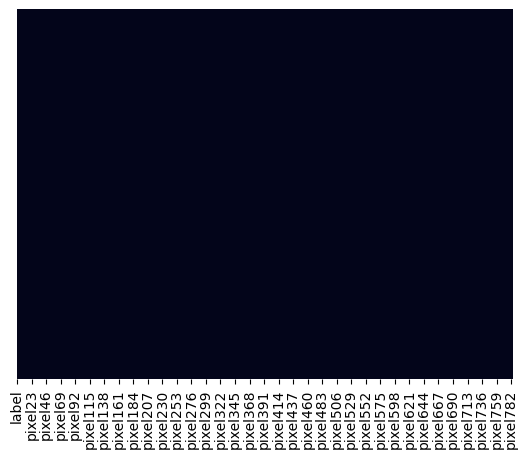

In [15]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [16]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [17]:
train_label = train['label']
train = train.drop(['label'],axis = 1)
test_label = test['label']
test = test.drop(['label'],axis=1)

In [18]:
train = train/255
test = test/255
train = np.array(train)
test = np.array(test)
train = train.reshape(train.shape[0],28,28,1)
test = test.reshape(test.shape[0],28,28,1)

In [22]:
labels = train_label.value_counts().sort_index(ascending=True)
fig = px.bar(
    x=labels.index,
    y=labels.values,
    title="Labels and their images",
    labels={"x": "Label", "y": "Number of Images"},
    text=labels.values,
    color_discrete_sequence=["#ADD8E6"],
)

fig.update_layout(
    title_x=0.5,
    title_font_color="#fff",
    title_font_size=20,
    paper_bgcolor="#000000",
    font_color="#fff",
    plot_bgcolor="#000000",
    xaxis=dict(
        tickmode='linear',
        ticktext=labels.index
    ))

fig.update_yaxes(showgrid=False)
fig.update_traces(textfont_color='purple')
fig.show()

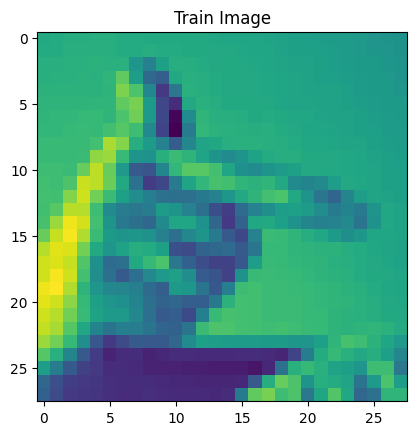

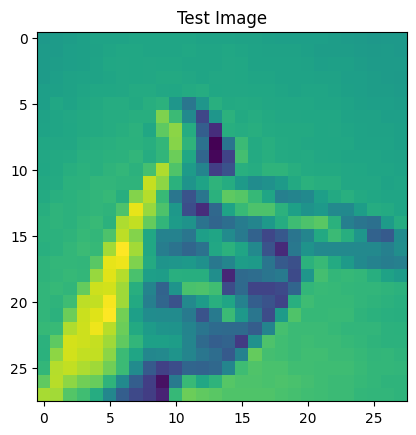

In [24]:
image_x = random.randint(0,len(test))
plt.imshow(np.reshape(train[image_x],(28,28)))
plt.title('Train Image')
plt.show()
plt.imshow(np.reshape(test[image_x],(28,28)))
plt.title('Test Image')
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),padding ='Same',activation = 'relu',input_shape=(28,28,1)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       7

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(25, activation ='softmax'))

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [30]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(train, train_label, verbose=1)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test, test_label, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



225/225 [==============================] - 9s 41ms/step - loss: 3.2215 - accuracy: 0.0287


In [32]:
model.fit(train, train_label, epochs=10, batch_size=32, validation_data=(test, test_label))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



858/858 [==============================] - 180s 207ms/step - loss: 0.5466 - accuracy: 0.8322 - val_loss: 0.1775 - val_accuracy: 0.9467
Epoch 2/10
858/858 [==============================] - 186s 217ms/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 0.7237 - val_accuracy: 0.8122
Epoch 3/10
858/858 [==============================] - 172s 200ms/step - loss: 0.0271 - accuracy: 0.9910 - val_loss: 0.3202 - val_accuracy: 0.9226
Epoch 4/10
858/858 [==============================] - 177s 206ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.2229 - val_accuracy: 0.9460
Epoch 5/10
858/858 [==============================] - 175s 205ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.6363 - val_accuracy: 0.8017
Epoch 6/10
858/858 [==============================] - 171s 200ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.1222 - val_accuracy: 0.9697
Epoch 7/10
858/858 [==============================] - 170s 199ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.1921 - val_accura

In [33]:
model.evaluate(test,test_label)

225/225 [==============================] - 16s 73ms/step - loss: 0.1360 - accuracy: 0.9625


[0.13603410124778748, 0.9624930024147034]

In [34]:
y_pred = model.predict(test)
y_pred =np.argmax(y_pred,axis=1)
y_pred[5]

225/225 [==============================] - 11s 47ms/step


21

In [35]:
y_pred[6]

10

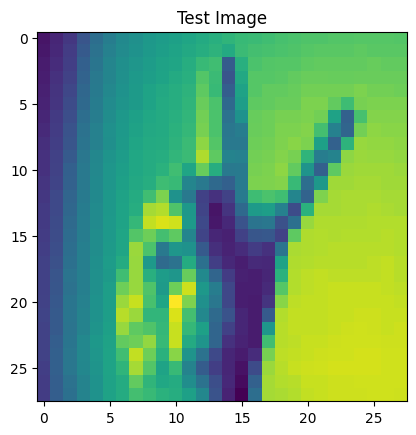

In [36]:
plt.imshow(np.reshape(test[5],(28,28)))
plt.title('Test Image')
plt.show()

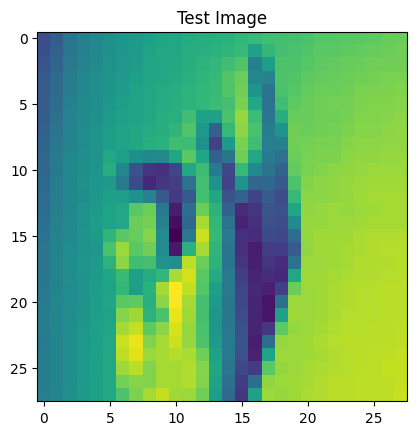

In [37]:
plt.imshow(np.reshape(test[6],(28,28)))
plt.title('Test Image')
plt.show()

In [42]:
accuracy = accuracy_score(y_pred,test_label)
mse = mean_squared_error(y_pred,test_label)
print("accuracy :",accuracy)
print("mean squared error : ",mse)

accuracy : 0.9624930284439487
mean squared error :  3.46723368655884
